# Baseball Case Study

##### Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

##### Importing Libraries

In [1]:
import pandas  as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import scipy as stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the Dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [5]:
df.shape

(30, 17)

From above, we can see thata there are total 17 columns, out of which 16 are features and 1 column is our target  which is Wins(W).

Features descriptions area as:  R-Runs Scored, AB-At Bats, H- Hits, 2B-Doubles, 3B-Triples, HR-Home Runs, BB- Base on Balls, SO-Strike Outs, SB-Stolen Bases, RA-Runs Allowed, ER-Erned Runs, ERA-Earned Run Average, CG-Complete Games, SHO-Shutouts, SV-Saves, E-Error

## Exploratory Data Analysis (EDA)

In [9]:
# To get overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


From above, we can see that except ERA, all columns have integer datatypes. ERA is float datatype. From above, we can also observed that all columns are numerical in nature. Since no catagorical data is present in our dataset. we don't need to use encoding technique.

In [10]:
# Checking count of null values from the dataset.
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

From above, we can see that there are no missing values in the dataset.

<AxesSubplot:>

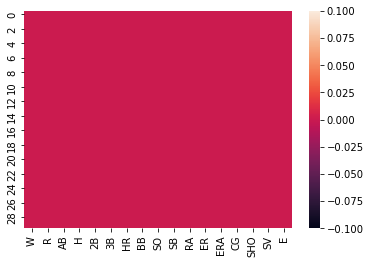

In [11]:
# Let's visualize the null values clearly through Heatmap
sns.heatmap(df.isnull())

Renaming the columns with their description. This will help us to understand and analysie the data more easily

In [4]:
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [16]:
# Statistical summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs Scored,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At Bat,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Home Runs,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Base on Balls,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strike Outs,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen Base,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


As the no. of columns are more, we have use transpose method to visualise the data. We have previously seen that there is no missing value, so here we can see count is 30 for all column.
By looking at mean, std deviation, min value, 25% quartile, 50% quartile, 75% quartile and max value, we could not observe any abnormalities. We will check each column more detail.

### Data Visualisation

#### Univariate Analysis

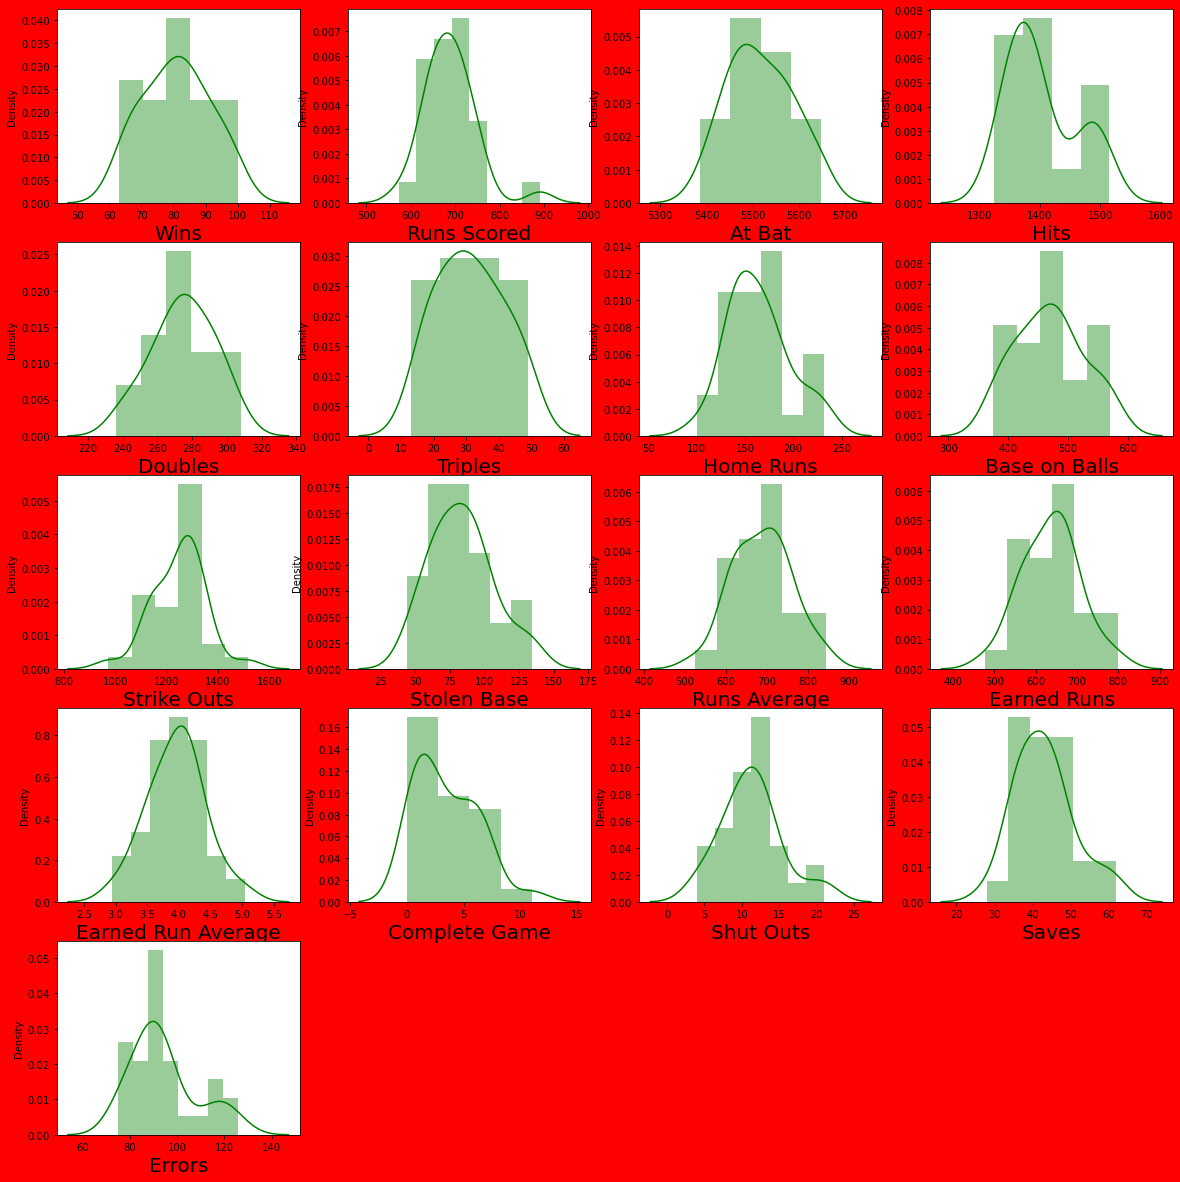

In [17]:
#Checking the Data Distribution on each column

plt.figure(figsize=(20,25), facecolor='red')
plotnumber = 1

for column in df:
    if plotnumber<=17:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

From above plot we can see that most of the columns are normally distributed except few columns like, Runs Scored, Complete Game, Shut Outs, Errors. For these columns, we can see some skewness.
We will deal with these columns later.

#### Bivariate Analysis

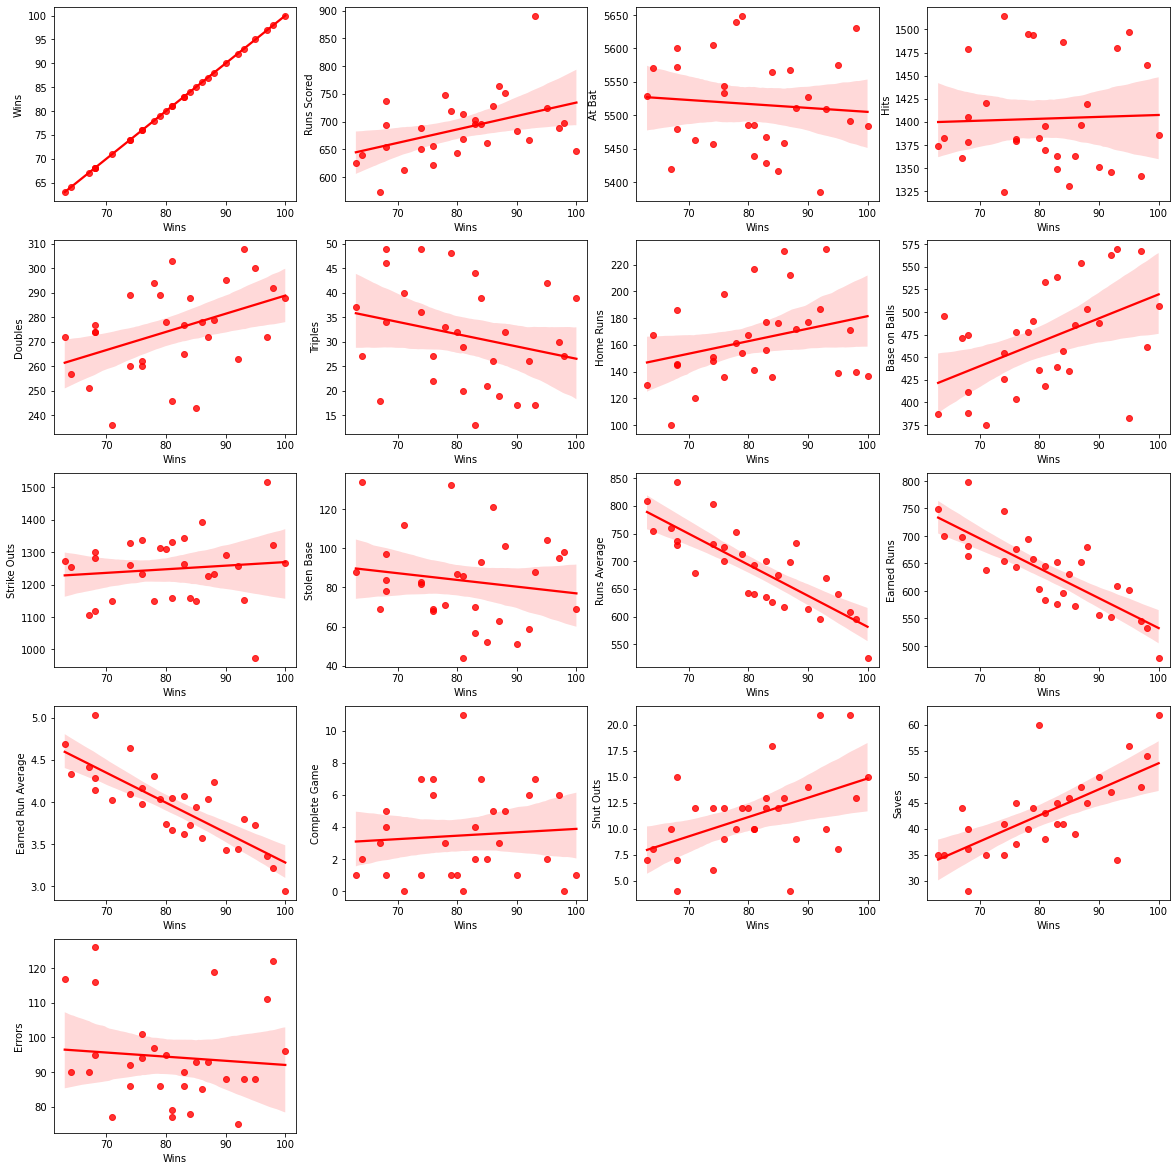

In [19]:
plt.figure(figsize=(20,25))
plotnumber = 1
for i in df:
    if plotnumber<=17:
        ax = plt.subplot(6,4,plotnumber)
        sns.regplot(x='Wins',y=i,data=df,color='r')
        plt.xlabel("Wins")
        plt.ylabel(i)
    plotnumber+=1
    
plt.show()

From above plot, we can see that features like Base on Balls(BB) and Saves(SV) have high positive linear relationship.
Features like Runs Average, Earned Runs, Earned Run Average highly negative relationship with target.
Features like Runs Scored, Doubles, Home runs, Shut Outs have positive relationship with target.
Features like At Bat, Tripples, Stolen Base, Errors have slightly negative relationship.


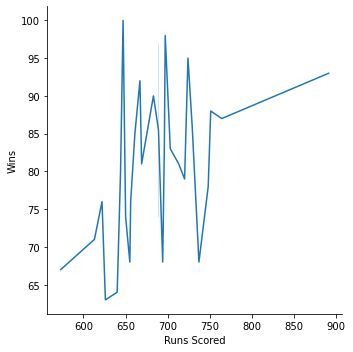

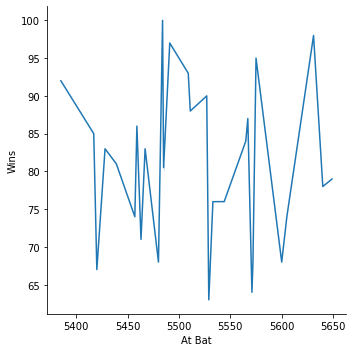

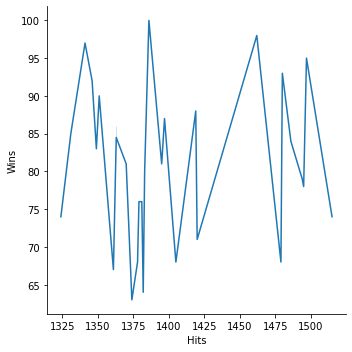

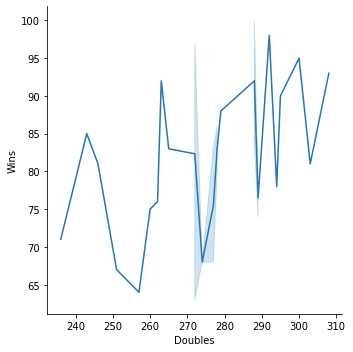

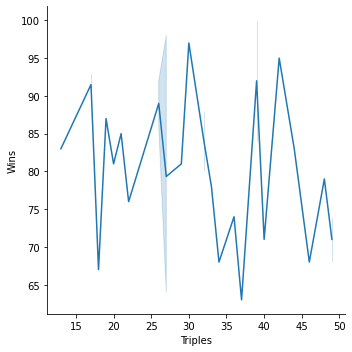

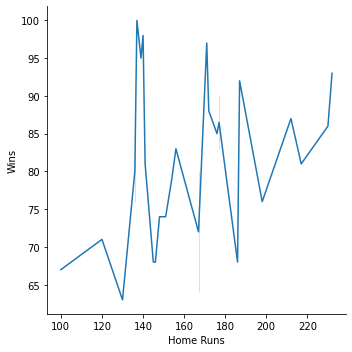

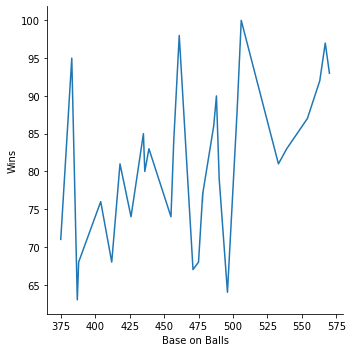

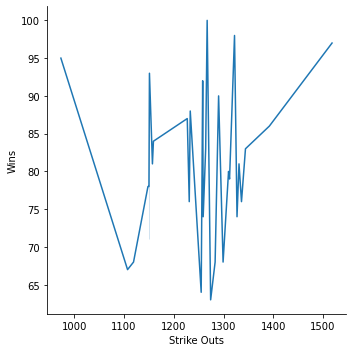

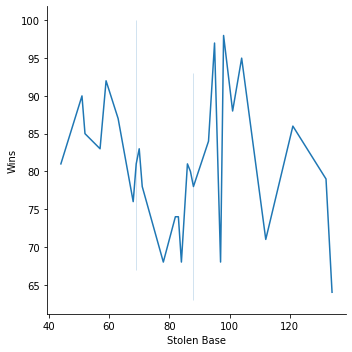

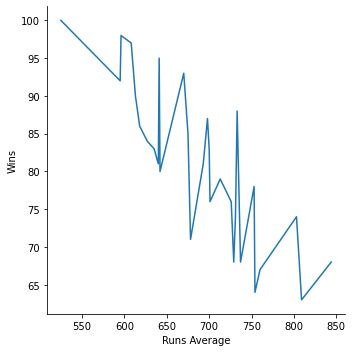

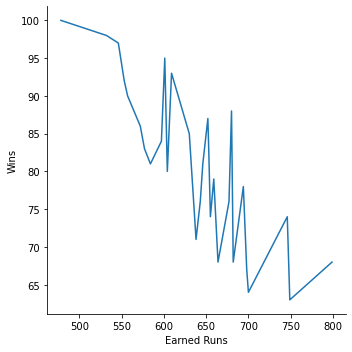

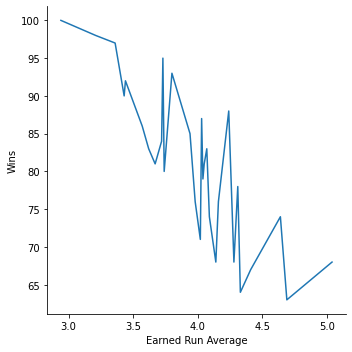

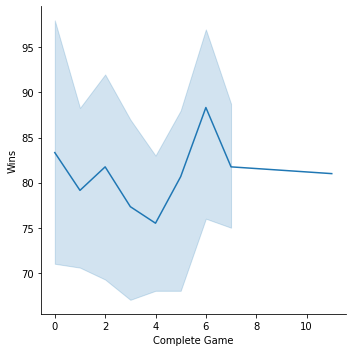

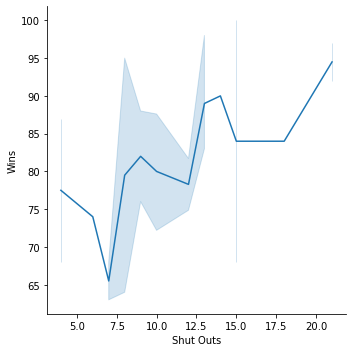

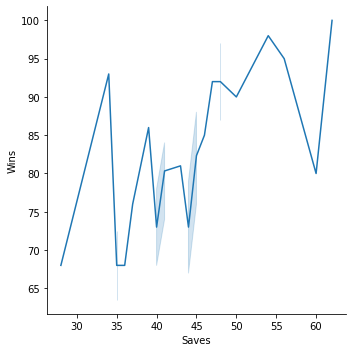

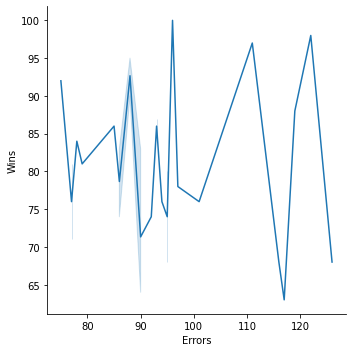

In [21]:
#Line plot

plotnumber = 0
features = df.drop("Wins", axis=1)
for col, value in features.items():
    sns.relplot(x=col, y="Wins", kind="line", data=df)
    plotnumber += 1
plt.show()

From above line plots against target "Wins" column shows how features are related. Some features are positively related with target variable, while few features are negatively corelated.

#### Multivariate Analysis

<Figure size 1224x720 with 0 Axes>

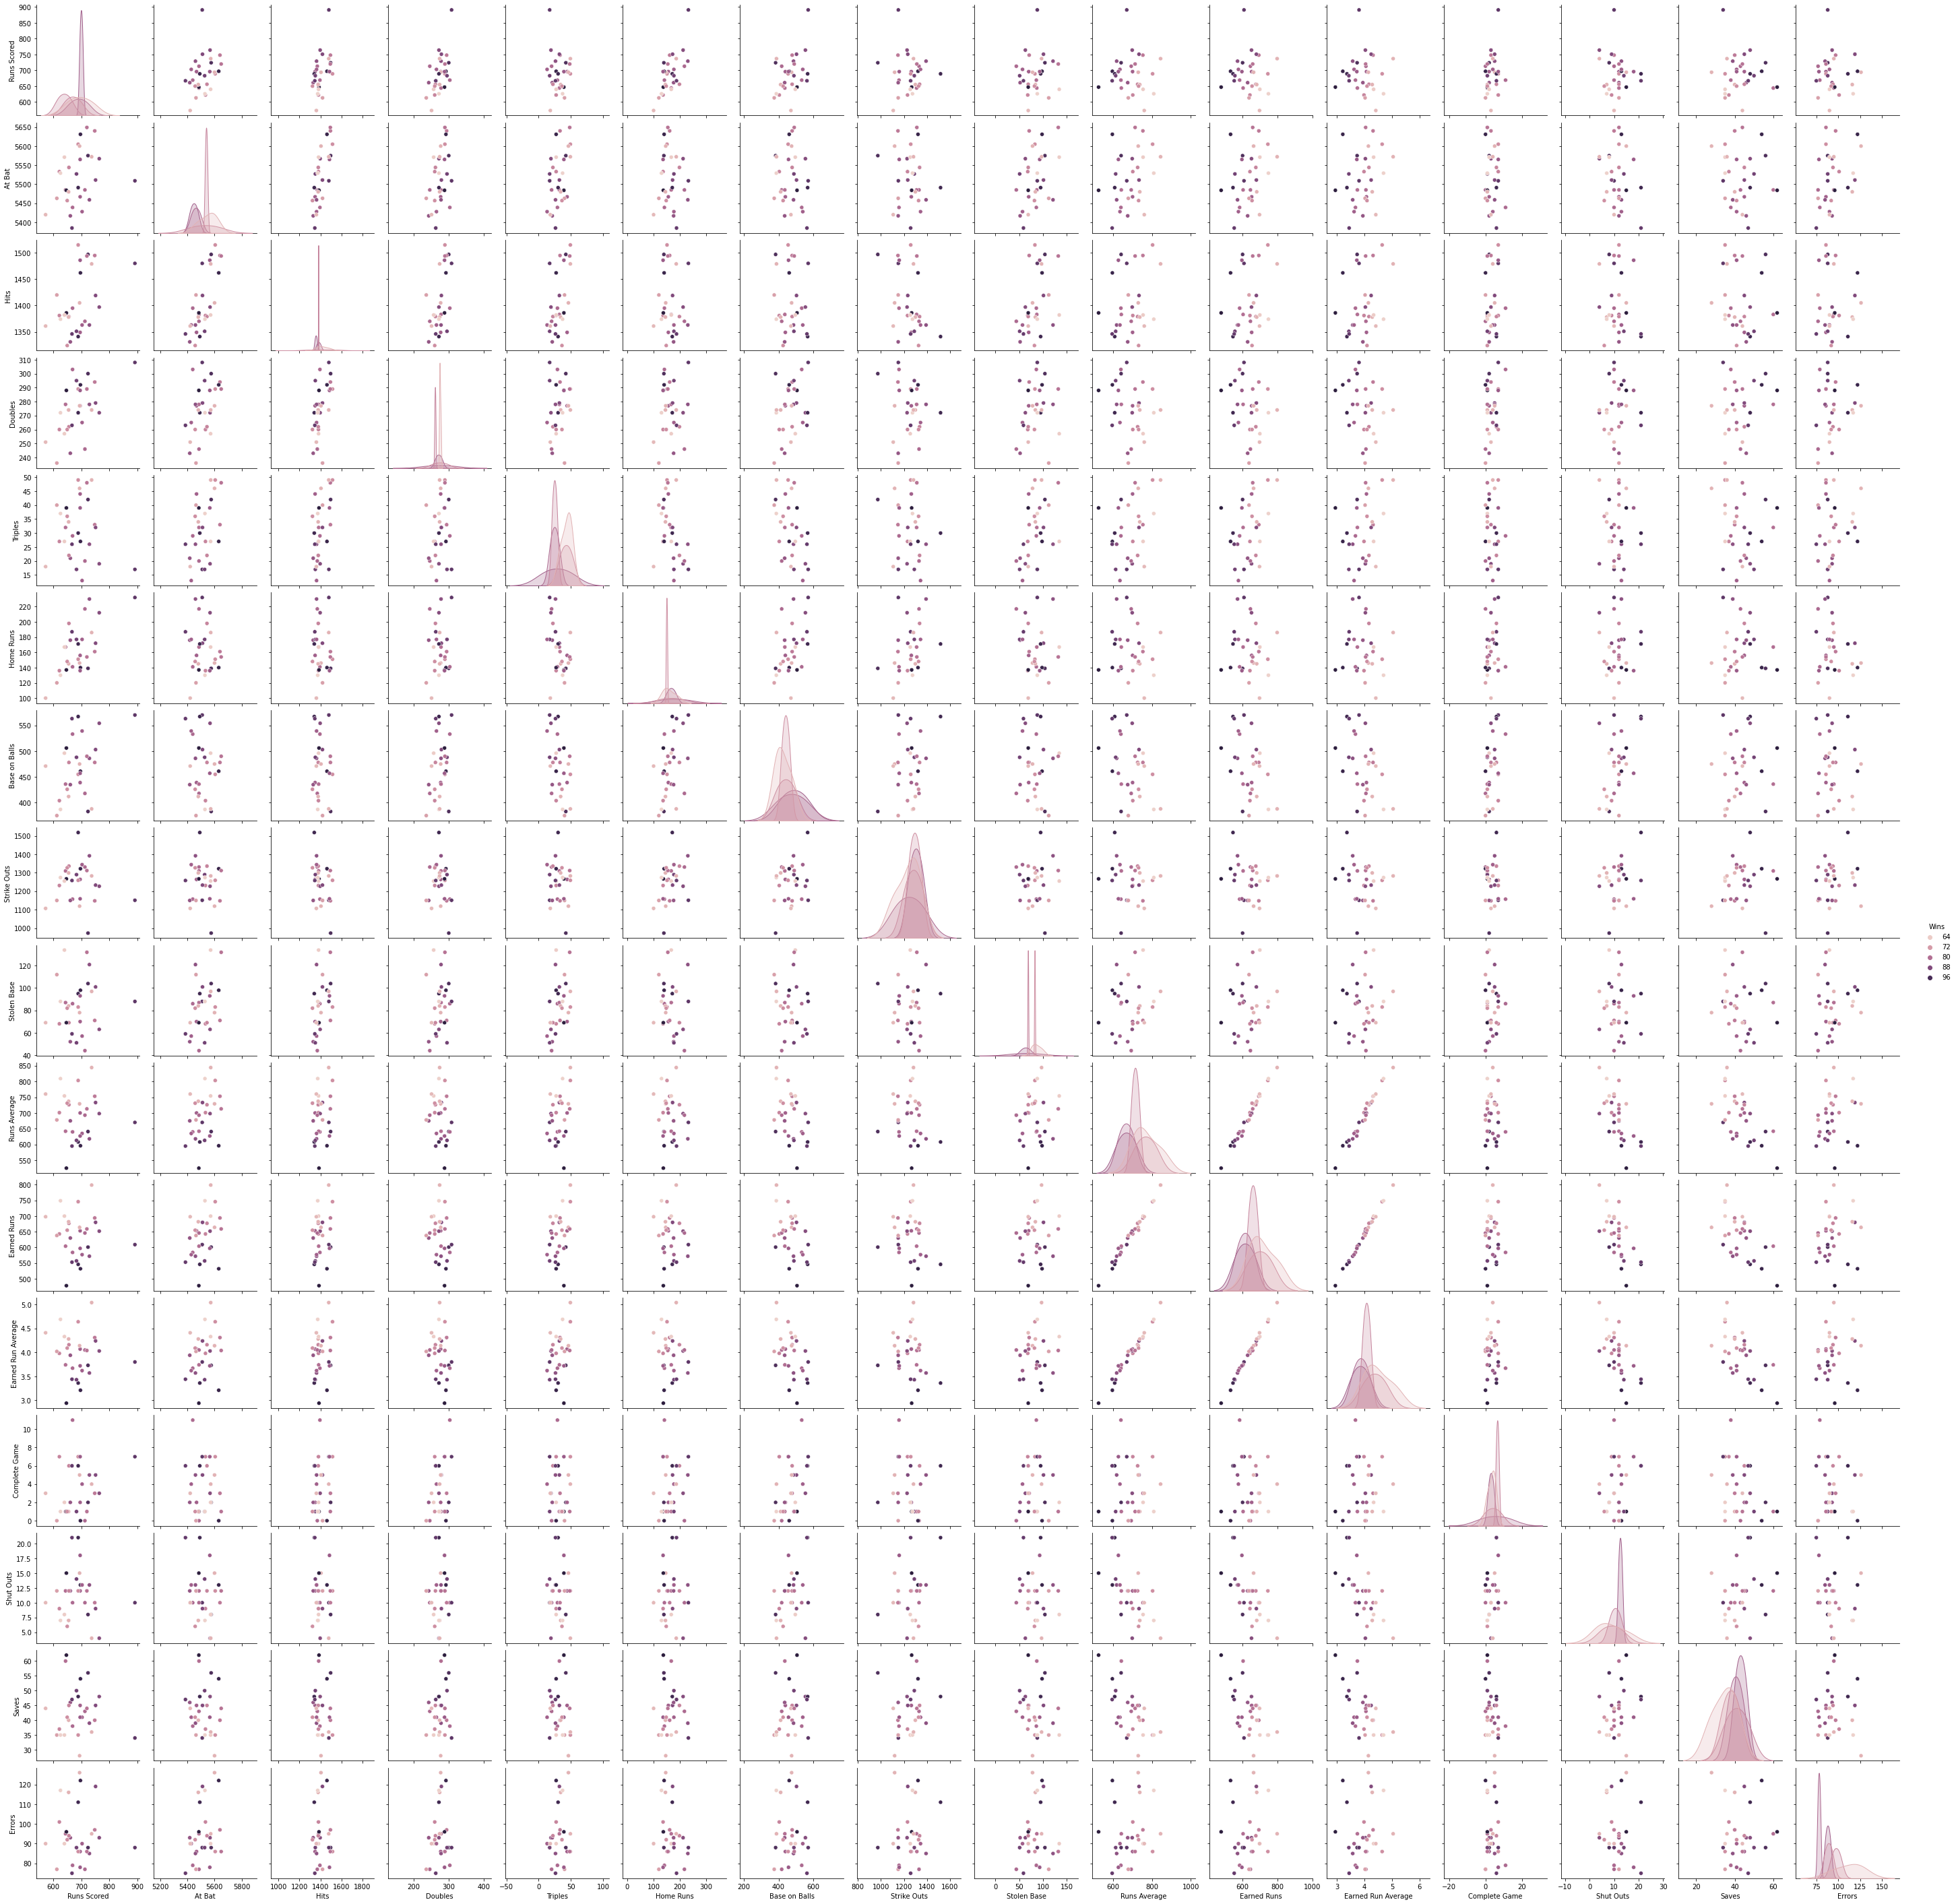

In [24]:
# Checking the pairwise relation in the dataset.

plt.figure(figsize=(17,10))
sns.pairplot(df, hue="Wins")
plt.show()

As the no of columns are more, above pairplot visibility is not very clear. We will now proceede with checking the correlation

### Correlation using HEAT map

In [7]:
cor = df.corr()
cor

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs Scored,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bat,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Home Runs,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Base on Balls,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strike Outs,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Base,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

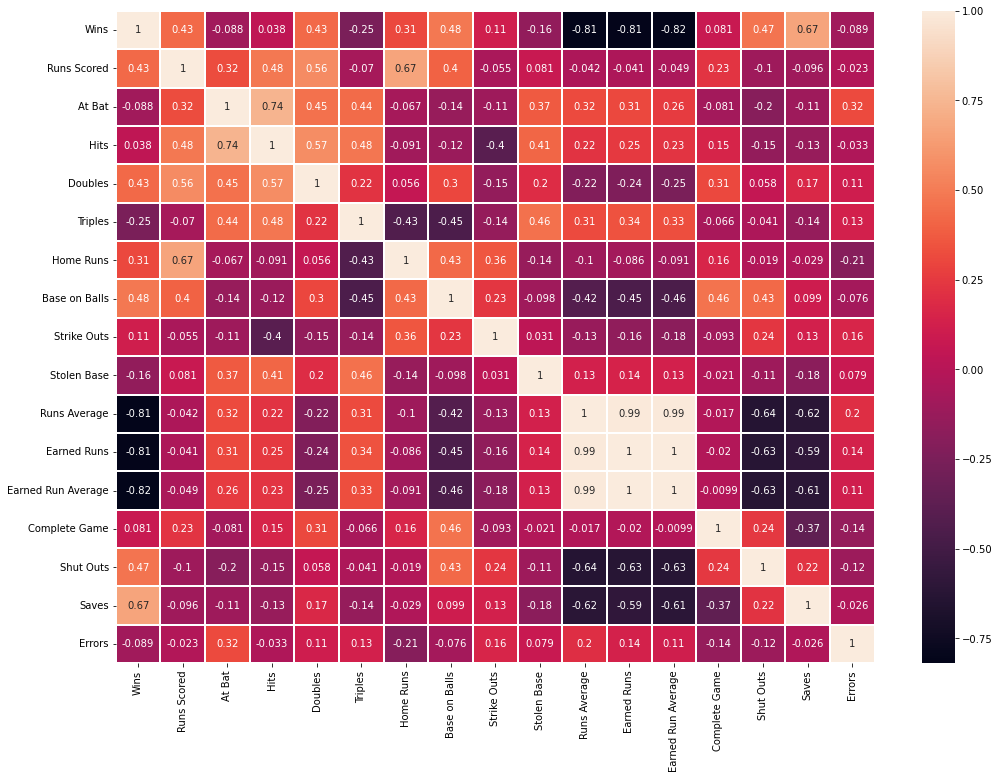

In [9]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0);

From above Heat map, we can see that 'Wins' is negatively correlated with features 'Earned Runs', 'Earned Run Average' and 'Runs Average'.
Also we can see there is multi collinearity between features 'Earned Runs', 'Earned Run Average' and 'Runs Average'. We can drop these features or may be use PCA to reduce the multi collinearity issue.

For now let's remove the fetures  'Earned Runs', 'Earned Run Average' as there is high collinearity with 'Runs Average'.

In [5]:
df = df.drop(["Earned Runs", "Earned Run Average"], axis=1)


In [8]:
df.head(5)

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,7,12,35,86


### Outliers

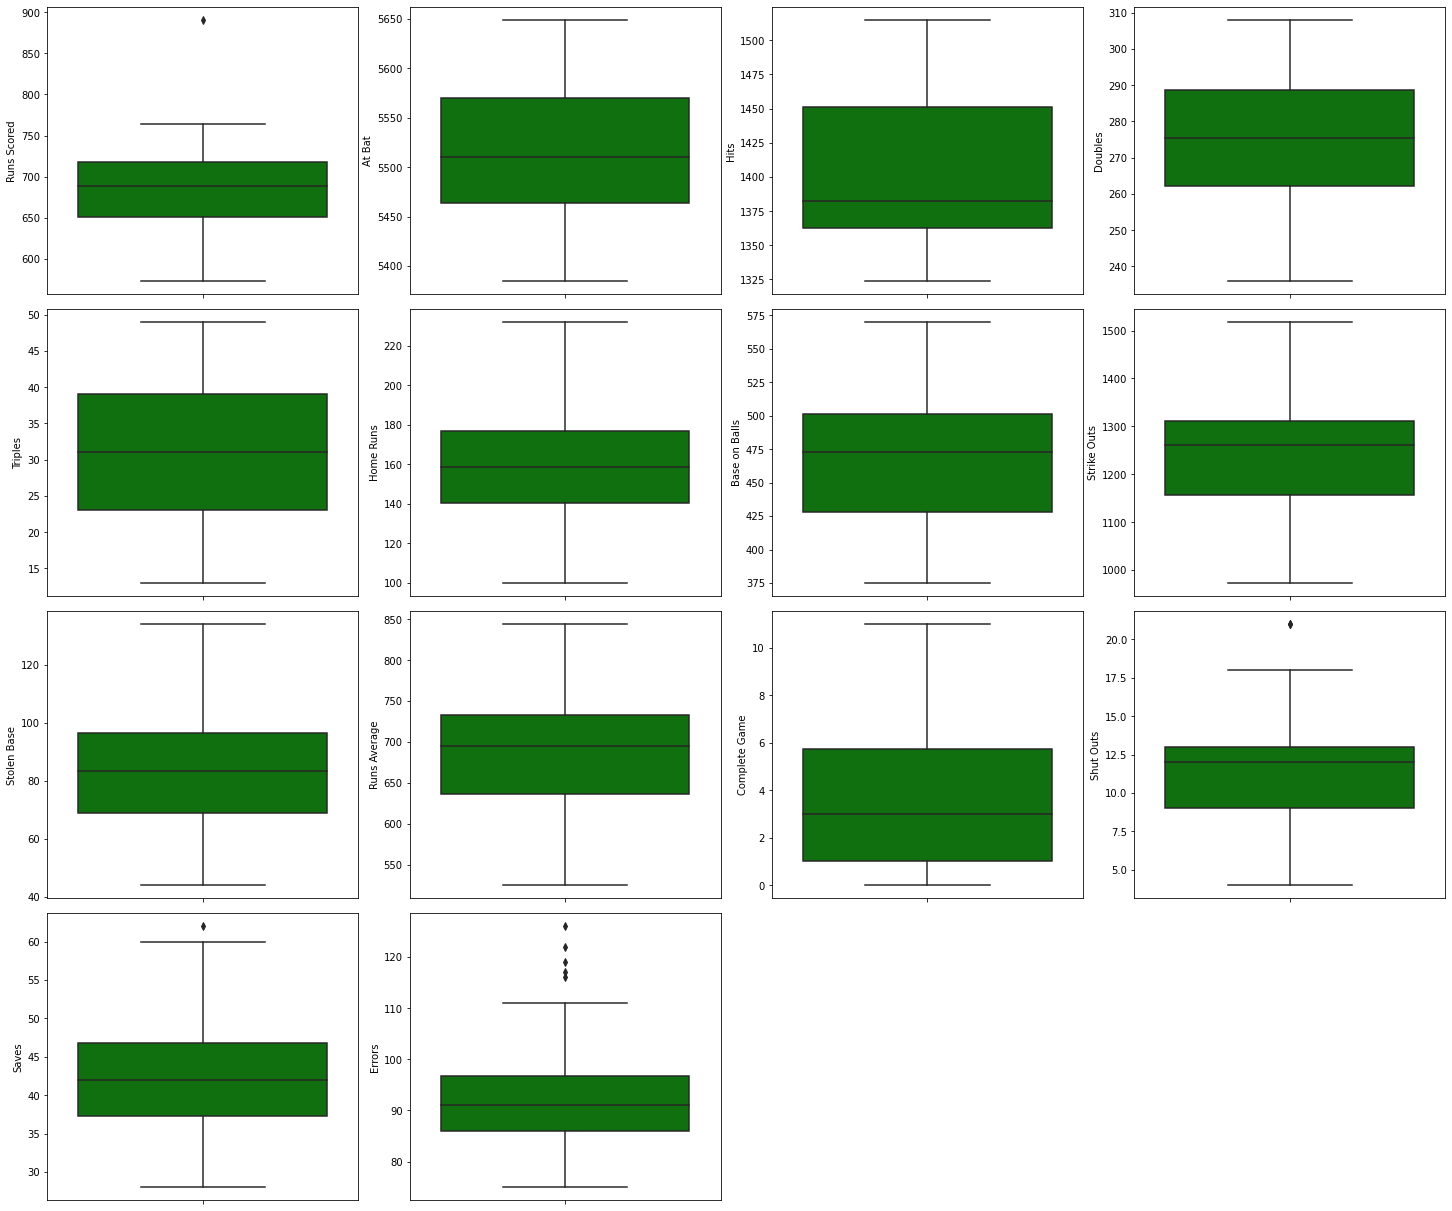

In [18]:
#Let's check the Outliers through Boxplot

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
features = df.drop("Wins", axis=1)
for column in features:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(y=column, data=df,color='g')        
    plotnumber+=1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

From above box plot, we can see few outlier points present in Runs Scored, Shut Outs, Saves and Errors. Let's remove these Outliers through Z Score

#### Removing outliers using Zscore

In [19]:
df.columns

Index(['Wins', 'Runs Scored', 'At Bat', 'Hits', 'Doubles', 'Triples',
       'Home Runs', 'Base on Balls', 'Strike Outs', 'Stolen Base',
       'Runs Average', 'Complete Game', 'Shut Outs', 'Saves', 'Errors'],
      dtype='object')

In [6]:
# Features having outliers
df1= df[['Runs Scored', 'Shut Outs', 'Saves', 'Errors' ]]

In [7]:
# Using zscore to remove outliers in the feature newpaper
from scipy.stats import zscore

z=np.abs(zscore(df1))

# Creating new dataframe
new_df=df[(z<3).all(axis=1)]
new_df

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,5,9,45,119


In [8]:
df.shape

(30, 15)

In [9]:
new_df.shape

(29, 15)

In [10]:
# Let's check the the data loss
data_loss = (30-29)/30*100
data_loss

3.3333333333333335

In [11]:
df=new_df.copy() # Reassigning the changed dataframe name to our original dataframe name

### Skewness

In [28]:
# Checking the skewness
df.skew()

Wins             0.119013
Runs Scored     -0.215364
At Bat           0.169573
Hits             0.783772
Doubles         -0.335304
Triples          0.090124
Home Runs        0.450862
Base on Balls    0.151193
Strike Outs     -0.233815
Stolen Base      0.494966
Runs Average     0.018155
Complete Game    0.854980
Shut Outs        0.526943
Saves            0.627480
Errors           0.840271
dtype: float64

From above table, we can see some skewness on few features. But those are of acceptable range of +/- 0.5

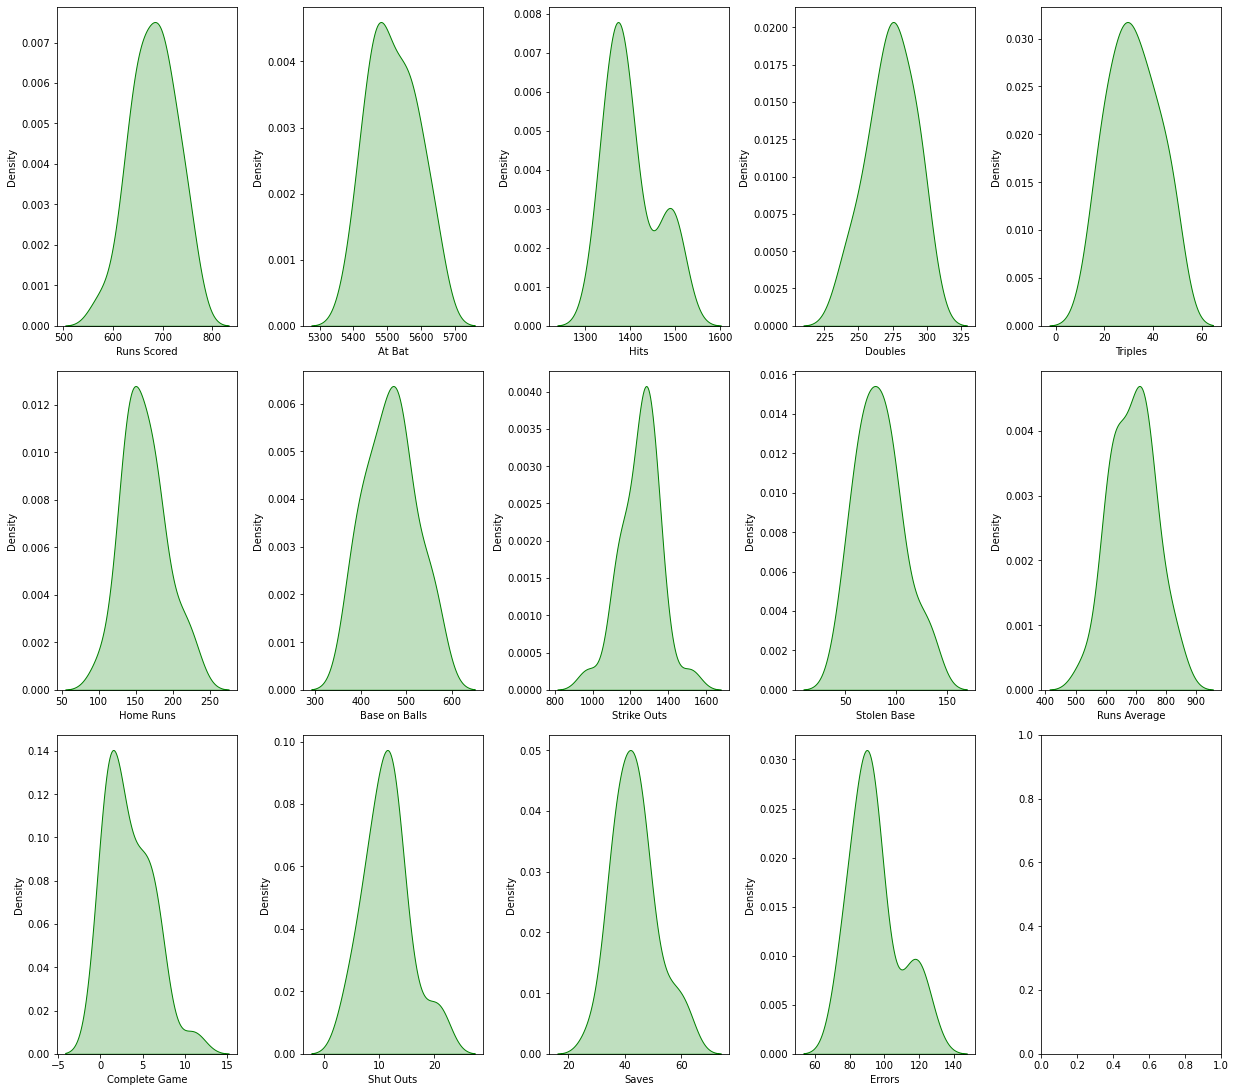

In [15]:
#Let's check the skewness through Dist plot.

fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(17,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

From above plot, we can see all most Bell shape curve for all features. Looks like normalised data.

# Data preprocessing

#### Separating the independent and target variables into x and y

In [12]:
x = df.drop('Wins', axis=1)
y = df['Wins']

##### Scaling data with standard scaler

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head(5)

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Complete Game,Shut Outs,Saves,Errors
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.363013,0.159299,-1.090948,-0.614898


This is our scaled data using standard scaler.

#### Variance Inflation Factor(VIF)

From Heatmap we have checked the multi collinearity issue and drop 2 columns. We will further check the VIF for any other multicollinearity issue

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Value"]=[variance_inflation_factor(x.values, i)for i in range(len(x.columns))]
vif

,Features,VIF Value
0,Runs Scored,6.755059
1,At Bat,4.961772
2,Hits,8.164151
3,Doubles,3.391156
4,Triples,3.171542
5,Home Runs,6.350851
6,Base on Balls,3.148538
7,Strike Outs,2.135385
8,Stolen Base,1.881279
9,Runs Average,5.088134


From VIF, all values are less than 10, so there is no multicollinearity problem. Now we can proceede with model building

# Modeling

### Finding best random state

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [16]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Maximum r2 score is ",maxAccu,"on Random_state ",maxRS)

Maximum r2 score is  0.9183680014268848 on Random_state  47


So, here we are getting the maximum r2 score as 91.83% on the random state 47.

Now splitting the data for Training and Testing purpose. 75% we are considering for Training and 25% for Testing purpose

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=maxRS)

## Applying Regression Algorithms

##### Importing all the Regression Algorithms

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

## Linear Regression

In [19]:
# Checking R2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('Mean abs error(MAE):',mean_absolute_error(y_test, predLR))
print('Mean squared error(MSE):',mean_squared_error(y_test, predLR))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predLR)))


R2_score: 0.9183680014268848
Mean abs error(MAE): 2.4446281032215857
Mean squared error(MSE): 10.137673822798739
Root Mean squared error(RMSE): 3.1839713916426353


## Ridge Regressor

In [23]:
# Checking R2 score for Ridge regressor
ridge=Ridge(alpha=1e-2, normalize=True)
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
pred_ridge=ridge.predict(x_test)
print('R2_score:',r2_score(y_test,pred_ridge))
print('Mean abs error(MAE):',mean_absolute_error(y_test, pred_ridge))
print('Mean squared error(MSE):',mean_squared_error(y_test, pred_ridge))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, pred_ridge)))

R2_score: 0.9047502060239191
Mean abs error(MAE): 2.7711456718640193
Mean squared error(MSE): 11.828833789404548
Root Mean squared error(RMSE): 3.439307167062074


## Lasso Regressor

In [24]:
## Checking R2 score for Lasso regressor
lasso=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
lasso.fit(x_train,y_train)
lasso.score(x_train,y_train)
pred_lasso=lasso.predict(x_test)
print('R2_score:',r2_score(y_test,pred_lasso))
print('Mean abs error(MAE):',mean_absolute_error(y_test, pred_lasso))
print('Mean squared error(MSE):',mean_squared_error(y_test, pred_lasso))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2_score: 0.9035180621393073
Mean abs error(MAE): 2.8217016542308215
Mean squared error(MSE): 11.981850658074773
Root Mean squared error(RMSE): 3.461480992014079


## Random Forest Regressor

In [25]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predRFR)))

R2_Score: 0.6535325616507299
Mean abs error: 4.937499999999998
Mean squared error: 43.02692499999998
Root Mean squared error(RMSE): 6.559491215025749


## Decision Tree Regressor

In [26]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('Mean abs error:',mean_absolute_error(y_test, predDTR))
print('Mean squared error:',mean_squared_error(y_test, predDTR))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predDTR)))

R2_Score: 0.6618017111222949
Mean abs error: 5.75
Mean squared error: 42.0
Root Mean squared error(RMSE): 6.48074069840786


## KNN Regressor

In [27]:
# Checking R2 score for KNN regressor
knn=KNN()
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predknn)))

R2_Score: 0.5501560140915952
Mean abs error: 6.325000000000001
Mean squared error: 55.86500000000002
Root Mean squared error(RMSE): 7.474289263869845


## Support Vector Regressor

In [28]:
# Checking R2 score for KNN regressor
svr=SVR()
svr.fit(x_train,y_train)

#prediction
predsvr=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,predsvr))
print('Mean abs error:',mean_absolute_error(y_test, predsvr))
print('Mean squared error:',mean_squared_error(y_test, predsvr))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predsvr)))

R2_Score: 0.030784106971514347
Mean abs error: 9.31643572947553
Mean squared error: 120.36449871547507
Root Mean squared error(RMSE): 10.97107554962024


## Stochastic Gradient Descent Regressor

In [29]:
# Checking R2 score for SGD Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

#prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('Mean abs error:',mean_absolute_error(y_test, predSGD))
print('Mean squared error:',mean_squared_error(y_test, predSGD))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predSGD)))

R2_Score: 0.58937793353946
Mean abs error: 6.43209486204353
Mean squared error: 50.99412787856831
Root Mean squared error(RMSE): 7.141017285973218


## Gradient Boosting Regressor

In [30]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)

#prediction
predGBR=GBR.predict(x_test)
print('R2_Score:',r2_score(y_test,predGBR))
print('Mean abs error:',mean_absolute_error(y_test, predGBR))
print('Mean squared error:',mean_squared_error(y_test, predGBR))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predGBR)))

R2_Score: 0.5788539674561064
Mean abs error: 5.794506451703699
Mean squared error: 52.30107291654479
Root Mean squared error(RMSE): 7.231948072030439


## Checking the cross validation score

In [21]:
# Checking cv score for Linear Regression
print('The CV score  for Linear_regression is :',cross_val_score(LR,x,y,cv=6).mean())

The CV score  for Linear_regression is : 0.2266227427534769


In [31]:
# Checking cv score for Ridge Regression
print('The CV score  for Ridge_regression is :',cross_val_score(ridge,x,y,cv=6).mean())

The CV score  for Ridge_regression is : 0.24484107514312078


In [32]:
# Checking cv score for Lasso Regression
print('The CV score  for Lasso_regression is :',cross_val_score(lasso,x,y,cv=6).mean())

The CV score  for Lasso_regression is : 0.2587678042746144


In [33]:
# Checking cv score for Random Forest Regression
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x,y,cv=6).mean())

The CV  score for  the Random forest regressor is: -0.3124543840151648


In [34]:
# Checking cv score for Decision Tree Regression
print('The CV score  for  the Decision Tree Regression is :',cross_val_score(DTR,x,y,cv=6).mean())

The CV score  for  the Decision Tree Regression is : -2.331218795502069


In [35]:
# Checking cv score for KNN Regression
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x,y,cv=6).mean())

The CV score  for  the KNN regressor is : 0.3172270215000108


In [36]:
# Checking cv score for SVR Regression
print('The CV score  for  the SVR regressor is :',cross_val_score(svr,x,y,cv=6).mean())

The CV score  for  the SVR regressor is : -0.1426226890179779


In [37]:
# Checking cv score for SGD Regression
print('The  CV score for the SGD  regressor is :',cross_val_score(SGD,x,y,cv=6).mean())

The  CV score for the SGD  regressor is : -0.002769788769879803


In [38]:
# Checking cv score for GBR Regression
print('The  CV score for the GradientBoosting  regressor is :',cross_val_score(GBR,x,y,cv=6).mean())

The  CV score for the GradientBoosting  regressor is : -1.0143384835057054


From the above observation, looking at the R2 score and the cross validation score we conclude that Linear Regression is our best fitting model

# Hyperparameter tuning

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
#Linear Regression
parameters = {'fit_intercept' : [True, False],
              'normalize' : [True, False],
              'copy_X' : [True, False],
              'positive' : [True, False],
              'n_jobs' : [-2, -1, 1]
             }

In [41]:
GCV = GridSearchCV(LinearRegression(), parameters, cv=6)

Using GridSearch CV for Hyperparameter tunning my best fit model

In [42]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-2, -1, 1],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [43]:
GCV.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -2,
 'normalize': True,
 'positive': True}

In [48]:
Baseball_Win = LinearRegression(copy_X=True, fit_intercept=True, n_jobs= -2, normalize=True, positive=True)
Baseball_Win.fit(x_train, y_train)
pred_GCV = Baseball_Win.predict(x_test)

print('R2_score:',r2_score(y_test,pred_GCV))
print('Mean abs error(MAE):',mean_absolute_error(y_test, pred_GCV))
print('Mean squared error(MSE):',mean_squared_error(y_test, pred_GCV))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, pred_GCV)))

R2_score: 0.7665139174039535
Mean abs error(MAE): 4.95511858192307
Mean squared error(MSE): 28.996052882396533
Root Mean squared error(RMSE): 5.384798313994363


After Hyperparameter Tuning, getting R2 score as 76.65%

# Saving the model

In [50]:
# Saving the model using .pkl
import joblib
joblib.dump(Baseball_Win,"BaseBallCaseStudy.pkl")

['BaseBallCaseStudy.pkl']

In [51]:
# Let's Compare the actual and predicted result 

# Loading the saved model
model=joblib.load("BaseBallCaseStudy.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([95.26687968, 67.2091744 , 69.24237015, 82.69899898, 80.50494213,
       67.29152017, 87.13283175, 84.60525868])

In [52]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7
Predicted,95.26688,67.209174,69.24237,82.698999,80.504942,67.29152,87.132832,84.605259
Original,100.00000,76.000000,74.00000,86.000000,76.000000,64.00000,95.000000,87.000000


Let's plot the graph of Actual Win vs Predicted Win

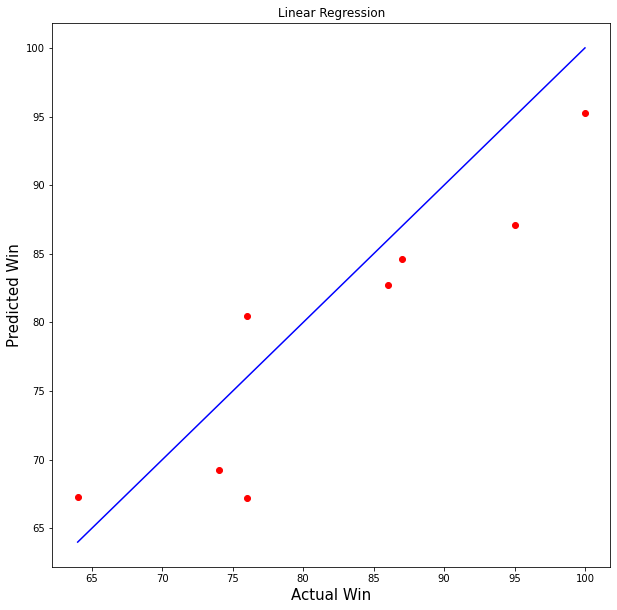

In [53]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='r')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Win', fontsize=15)
plt.ylabel('Predicted Win', fontsize=15)
plt.title("Linear Regression")
plt.show()